In [82]:
import requests
import calendar
import datetime

In [83]:
data = []
now = datetime.datetime.now()
nowyear = now.strftime('%Y')
nowmonth = now.strftime('%m')

In [84]:
for y in range(2019,2020):
    print('y : '+str(y) + 'year : ' + str(nowyear))
    if str(y)==str(nowyear):
        monthrange = int(nowmonth)+1
    else:
        monthrange = 13
        
    for m in range(1,monthrange):
        response = requests.get('http://www.kma.go.kr/weather/climate/past_cal.jsp?stn=108&yy='+str(y)+'&mm='+str(m)+'&obs=1')
        soup = bs(response.content, 'html.parser')
        table = soup.find('table', {'class': 'table_develop'})  

        count = 0
        point = [''] * 7
        pointt = [''] * 7
        fstr = [''] * 7
        tstr = [''] * 7
        mstr = [''] * 7
        estr = [''] * 7
        temp = [''] * 7
        temptop = [''] * 7
        tempmin = [''] * 7
        rain = [''] * 7
        
        for tr in table.find_all('tr'):
            tds = list(tr.find_all('td'))
    
            if tds:
                for i in range(0,7):
                    point[i] = tds[i].text
        
                if count%2!=0:
                    for j in range(0,7):
                        pointt[j] = point[j].translate({ord('일'):''})
            
                if count%2==0:
                    for k in range(0,7):
                        fstr[k] = point[k].find('최고기온')
                        tstr[k] = point[k].find('최저기온')
                        mstr[k] = point[k].find('평균운량')
                        estr[k] = point[k].find('일강수량')
                        temp[k] = point[k][5:fstr[k]].translate({ord('℃'):''})
                        temptop[k] = point[k][fstr[k]+5:tstr[k]].translate({ord('℃'):''})
                        tempmin[k] = point[k][tstr[k]+5:mstr[k]].translate({ord('℃'):''})
                        rain[k] = point[k][estr[k]+5:].translate({ord(' '):'',ord('-'):'0.0',ord('m'):''})
                
                    if pointt[0]=='\xa0' or temp[0]=='':
                        sun = ""
                    else:
                        sun = str(y)+'-'+str(m)+'-'+pointt[0]+' '+temp[0]+' '+temptop[0]+' '+tempmin[0]+' '+rain[0]
                        data.append([sun])
            
                    if pointt[1]=='\xa0' or temp[1]=='':
                        mon = ""
                    else:
                        mon = str(y)+'-'+str(m)+'-'+pointt[1]+' '+temp[1]+' '+temptop[1]+' '+tempmin[1]+' '+rain[1]
                        data.append([mon])
            
                    if pointt[2]=='\xa0' or temp[2]=='':
                        tue = ""
                    else:
                        tue = str(y)+'-'+str(m)+'-'+pointt[2]+' '+temp[2]+' '+temptop[2]+' '+tempmin[2]+' '+rain[2]
                        data.append([tue])
            
                    if pointt[3]=='\xa0' or temp[3]=='':
                        wed = ""
                    else:
                        wed = str(y)+'-'+str(m)+'-'+pointt[3]+' '+temp[3]+' '+temptop[3]+' '+tempmin[3]+' '+rain[3]
                        data.append([wed])
            
                    if pointt[4]=='\xa0' or temp[4]=='':
                        thu = ""
                    else:
                        thu = str(y)+'-'+str(m)+'-'+pointt[4]+' '+temp[4]+' '+temptop[4]+' '+tempmin[4]+' '+rain[4]
                        data.append([thu])
            
                    if pointt[5]=='\xa0' or temp[5]=='':
                        fri = ""
                    else:
                        fri = str(y)+'-'+str(m)+'-'+pointt[5]+' '+temp[5]+' '+temptop[5]+' '+tempmin[5]+' '+rain[5]
                        data.append([fri])
            
                    if pointt[6]=='\xa0' or temp[6]=='':
                        sat = ""
                    else:
                        sat = str(y)+'-'+str(m)+'-'+pointt[6]+' '+temp[6]+' '+temptop[6]+' '+tempmin[6]+' '+rain[6]
                        data.append([sat])
            
                    print(sun)
                    print(mon)
                    print(tue)
                    print(wed)
                    print(thu)
                    print(fri)
                    print(sat)
            count+=1


y : 2019year : 2020


NameError: name 'bs' is not defined

# 이거 긁어서 txt파일로 만듦

In [158]:
import pandas as pd
weader=pd.read_csv("C:/Users/hyeyo/AppData/Local/Programs/Python/Python37-32/기상청.txt", sep=' ')

In [159]:
weader.head()

,날짜,평균기온,최고기온,최저기온,평균운량
0,2019-1-1,-5.0,-0.6,-8.2,0.0
1,2019-1-2,-4.9,0.2,-8.8,0.0
2,2019-1-3,-3.5,3.2,-8.4,0.0
3,2019-1-4,-1.1,4.1,-6.2,0.0
4,2019-1-5,-2.8,1.1,-5.5,0.0


In [160]:
a=weader.loc[weader['날짜'].str.contains('2019-1-',na=False)].mean()
b=weader.loc[weader['날짜'].str.contains('2019-2-',na=False)].mean()
c=weader.loc[weader['날짜'].str.contains('2019-3-',na=False)].mean()
d=weader.loc[weader['날짜'].str.contains('2019-4-',na=False)].mean()
e=weader.loc[weader['날짜'].str.contains('2019-5-',na=False)].mean()
f=weader.loc[weader['날짜'].str.contains('2019-6-',na=False)].mean()
g=weader.loc[weader['날짜'].str.contains('2019-7-',na=False)].mean()
h=weader.loc[weader['날짜'].str.contains('2019-8-',na=False)].mean()
i=weader.loc[weader['날짜'].str.contains('2019-9-',na=False)].mean()
j=weader.loc[weader['날짜'].str.contains('2019-10-',na=False)].mean()
k=weader.loc[weader['날짜'].str.contains('2019-11-',na=False)].mean()
l=weader.loc[weader['날짜'].str.contains('2019-12-',na=False)].mean()

In [161]:
w2=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l], axis=1)
w2

,0,1,2,3,4,5,6,7,8,9,10,11
평균기온,-0.896774,0.985714,7.093548,12.120000,19.419355,22.503333,25.877419,27.190323,22.643333,16.370968,7.580000,1.416129
최고기온,4.087097,6.046429,12.445161,17.640000,25.641935,27.706667,30.087097,31.635484,27.100000,21.767742,12.933333,5.274194
최저기온,-5.064516,-3.217857,2.745161,7.176667,13.729032,18.060000,22.683871,23.590323,18.963333,11.800000,3.100000,-2.603226
평균운량,0.000000,0.850000,0.864516,1.576667,1.219355,2.480000,6.270968,6.145161,4.660000,1.790323,2.626667,0.729032


In [162]:
w2.columns=['1','2','3','4','5','6','7','8','9','10','11','12']

In [163]:
from pandas import DataFrame 

In [164]:
import matplotlib

In [165]:
from matplotlib import pyplot as plt


In [166]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [167]:
w4=w2.iloc[0]


w4=DataFrame(w4)


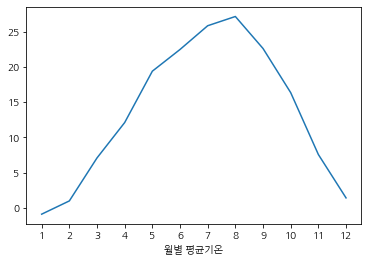

In [168]:
plt.plot(w4)
plt.xlabel('월별 평균기온')
plt.show()

In [169]:
import numpy as np
from scipy import stats

In [205]:
#날씨 데이터끼리 상관관계

corrMatt = weader[["평균기온","최고기온","최저기온","평균운량"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False    

          평균기온      최고기온      최저기온      평균운량
평균기온  1.000000  0.988765  0.989139  0.191019
최고기온  0.988765  1.000000  0.960860  0.133119
최저기온  0.989139  0.960860  1.000000  0.239778
평균운량  0.191019  0.133119  0.239778  1.000000


<AxesSubplot:>

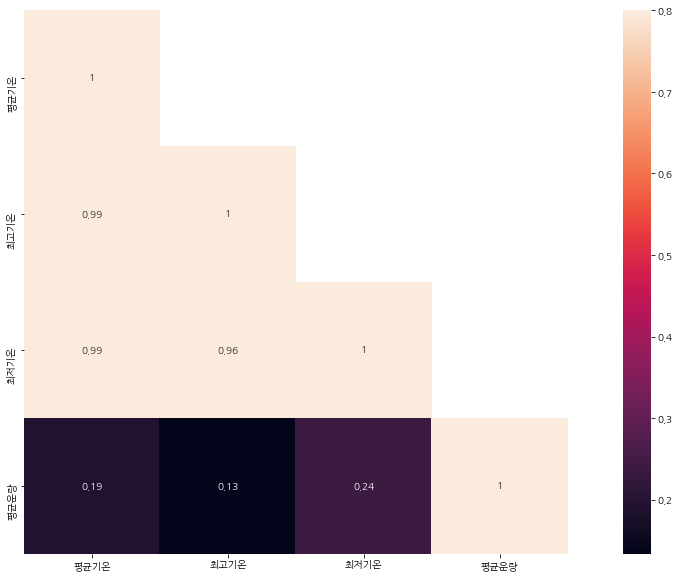

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [207]:
#preprocessing에서 월별 판매수량 데이터를 csv파일로 저장 후 불러냄

d=pd.read_csv("C:/Users/hyeyo/월별.csv")
d

,방송일시,판매수량
0,2019-01-31,9.433661e+05
1,2019-02-28,7.504978e+05
2,2019-03-31,8.155749e+05
3,2019-04-30,7.610234e+05
4,2019-05-31,8.702882e+05
5,2019-06-30,8.740217e+05
6,2019-07-31,9.578300e+05
7,2019-08-31,1.065119e+06
8,2019-09-30,9.483786e+05
9,2019-10-31,9.991663e+05


In [208]:
dd=d['판매수량']


In [209]:
#12월에서 차기 1월로 넘어가는 데이터 12월에 합치기
dd[11]=dd[11]+dd[12]


c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [210]:
dd.pop(12)

1309.5381019925182

In [211]:
dd

0     9.433661e+05
1     7.504978e+05
2     8.155749e+05
3     7.610234e+05
4     8.702882e+05
5     8.740217e+05
6     9.578300e+05
7     1.065119e+06
8     9.483786e+05
9     9.991663e+05
10    1.011114e+06
11    1.140930e+06
Name: 판매수량, dtype: float64

In [212]:
#리스트로 변환
dd=dd.tolist()

In [213]:
w2

,1,2,3,4,5,6,7,8,9,10,11,12
평균기온,-0.896774,0.985714,7.093548,12.120000,19.419355,22.503333,25.877419,27.190323,22.643333,16.370968,7.580000,1.416129
최고기온,4.087097,6.046429,12.445161,17.640000,25.641935,27.706667,30.087097,31.635484,27.100000,21.767742,12.933333,5.274194
최저기온,-5.064516,-3.217857,2.745161,7.176667,13.729032,18.060000,22.683871,23.590323,18.963333,11.800000,3.100000,-2.603226
평균운량,0.000000,0.850000,0.864516,1.576667,1.219355,2.480000,6.270968,6.145161,4.660000,1.790323,2.626667,0.729032


In [214]:
w22 = w2.append(pd.Series(dd, index=w2.columns),ignore_index=True)

In [215]:
dd

[943366.0658023931,
 750497.8400373077,
 815574.9095497133,
 761023.4134817887,
 870288.223008002,
 874021.7219488728,
 957830.0306277135,
 1065119.4340086165,
 948378.6404272593,
 999166.2603801936,
 1011113.5904771264,
 1140929.5113277046]

In [217]:
#월별 날씨데이터에 월별 판매수량 합치기
w22

,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.896774,0.985714,7.093548,12.120000,19.419355,22.503333,25.877419,2.719032e+01,22.643333,16.370968,7.580000e+00,1.416129e+00
1,4.087097,6.046429,12.445161,17.640000,25.641935,27.706667,30.087097,3.163548e+01,27.100000,21.767742,1.293333e+01,5.274194e+00
2,-5.064516,-3.217857,2.745161,7.176667,13.729032,18.060000,22.683871,2.359032e+01,18.963333,11.800000,3.100000e+00,-2.603226e+00
3,0.000000,0.850000,0.864516,1.576667,1.219355,2.480000,6.270968,6.145161e+00,4.660000,1.790323,2.626667e+00,7.290323e-01
4,943366.065802,750497.840037,815574.909550,761023.413482,870288.223008,874021.721949,957830.030628,1.065119e+06,948378.640427,999166.260380,1.011114e+06,1.140930e+06


In [218]:
#행렬 바꾸기
ww2 = np.transpose(w22)
ww2.to_csv('ww2.csv', encoding='cp949')
ww2

,0,1,2,3,4
1,-0.896774,4.087097,-5.064516,0.000000,9.433661e+05
2,0.985714,6.046429,-3.217857,0.850000,7.504978e+05
3,7.093548,12.445161,2.745161,0.864516,8.155749e+05
4,12.120000,17.640000,7.176667,1.576667,7.610234e+05
5,19.419355,25.641935,13.729032,1.219355,8.702882e+05
6,22.503333,27.706667,18.060000,2.480000,8.740217e+05
7,25.877419,30.087097,22.683871,6.270968,9.578300e+05
8,27.190323,31.635484,23.590323,6.145161,1.065119e+06
9,22.643333,27.100000,18.963333,4.660000,9.483786e+05
10,16.370968,21.767742,11.800000,1.790323,9.991663e+05


In [219]:
ww2.columns=['평균기온','최고기온','최저기온','평균운량','판매수량']

In [220]:
ww2

,평균기온,최고기온,최저기온,평균운량,판매수량
1,-0.896774,4.087097,-5.064516,0.000000,9.433661e+05
2,0.985714,6.046429,-3.217857,0.850000,7.504978e+05
3,7.093548,12.445161,2.745161,0.864516,8.155749e+05
4,12.120000,17.640000,7.176667,1.576667,7.610234e+05
5,19.419355,25.641935,13.729032,1.219355,8.702882e+05
6,22.503333,27.706667,18.060000,2.480000,8.740217e+05
7,25.877419,30.087097,22.683871,6.270968,9.578300e+05
8,27.190323,31.635484,23.590323,6.145161,1.065119e+06
9,22.643333,27.100000,18.963333,4.660000,9.483786e+05
10,16.370968,21.767742,11.800000,1.790323,9.991663e+05


In [221]:
corrMatt =ww2[["평균기온","최고기온","최저기온","평균운량","판매수량"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False    #연관관계

          평균기온      최고기온      최저기온      평균운량      판매수량
평균기온  1.000000  0.997909  0.998079  0.821202  0.127343
최고기온  0.997909  1.000000  0.992414  0.792599  0.088762
최저기온  0.998079  0.992414  1.000000  0.849585  0.151633
평균운량  0.821202  0.792599  0.849585  1.000000  0.325046
판매수량  0.127343  0.088762  0.151633  0.325046  1.000000


<AxesSubplot:>

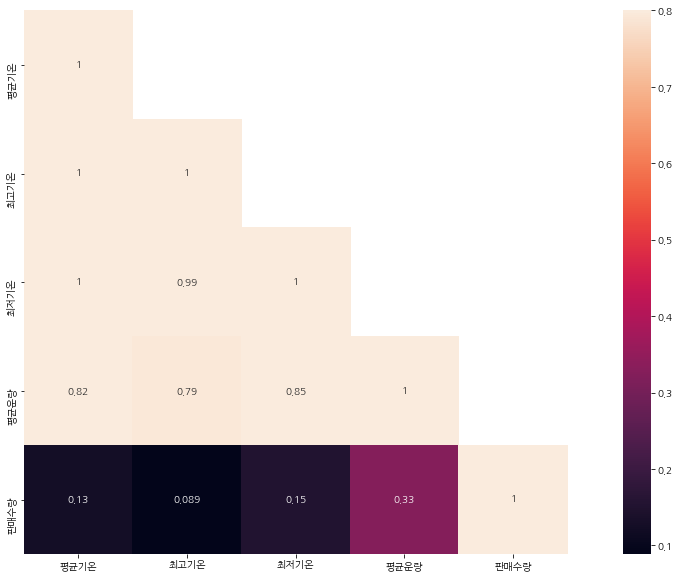

In [222]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## 판매수량은 평균운량과 가장 높은 상관관계 (맞게한건진 모르겠음..)
아마 비나 눈오는날 더 많이 팔렸을듯